# 5 (a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [86]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

In [3]:
from ISLP import load_data
Default = load_data('Default')
Default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [4]:
Default.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

In [5]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [10]:
Default.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
X = Default[["income", "balance"]]
y = Default["default"]

In [9]:
y.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [16]:
lr = LogisticRegression(solver = "liblinear")
lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [17]:
lr.coef_

array([[-0.00012588,  0.00040756]])

# (b)

### (i)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

### (ii)

In [19]:
lr = LogisticRegression(solver = "liblinear")
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### (iii)

In [26]:
probs = lr.predict_proba(X_test)
probs

array([[0.80319219, 0.19680781],
       [0.72680053, 0.27319947],
       [0.9920441 , 0.0079559 ],
       ...,
       [0.96055721, 0.03944279],
       [0.954889  , 0.045111  ],
       [0.96181629, 0.03818371]])

In [40]:
preds = ["Yes" if prob[0]<0.5 else "No" for prob in probs]

In [41]:
p = lr.predict(X_test)
pd.Series(p).value_counts()

No     1999
Yes       1
dtype: int64

In [38]:
pd.Series(preds).value_counts()

Yes    1999
No        1
dtype: int64

### (iv)

In [42]:
accuracy_score(preds, y_test)

0.966

# (c)

In [43]:
for _ in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lr = LogisticRegression(solver = "liblinear")
    lr.fit(X_train, y_train)
    acc = accuracy_score(lr.predict(X_test), y_test)    
    print(acc)

0.9575
0.9695
0.9685


# (d)

In [48]:
X = Default[["income", "balance", "student"]]
y = Default["default"]
X

,income,balance,student
0,44361.625074,729.526495,No
1,12106.134700,817.180407,Yes
2,31767.138947,1073.549164,No
3,35704.493935,529.250605,No
4,38463.495879,785.655883,No
...,...,...,...
9995,52992.378914,711.555020,No
9996,19660.721768,757.962918,No
9997,58636.156984,845.411989,No
9998,36669.112365,1569.009053,No


In [49]:
X = pd.get_dummies(X, drop_first=True)
X

,income,balance,student_Yes
0,44361.625074,729.526495,0
1,12106.134700,817.180407,1
2,31767.138947,1073.549164,0
3,35704.493935,529.250605,0
4,38463.495879,785.655883,0
...,...,...,...
9995,52992.378914,711.555020,0
9996,19660.721768,757.962918,0
9997,58636.156984,845.411989,0
9998,36669.112365,1569.009053,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LogisticRegression(solver = "liblinear")
lr.fit(X_train, y_train)
accuracy_score(lr.predict(X_test), y_test)    

0.965

There has been no reduction in test error due to inclusion of the dummy variable

# 6 (a)

In [52]:
np.random.seed(42)

In [70]:
X = Default[["income", "balance"]]
X = sm.add_constant(X)
y = Default["default"]

In [71]:
y = pd.get_dummies(y, drop_first=True)
y

,Yes
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [72]:
glm = sm.GLM(y, X, family=sm.families.Binomial()).fit()

In [73]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Sat, 04 Nov 2023   Deviance:                       1579.0
Time:                        19:19:14   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================
"""

In [74]:
glm.params / glm.tvalues

const      0.434772
income     0.000005
balance    0.000227
dtype: float64

# (b)

In [83]:
def boot_fn(df, indexes):
    X = df[["income", "balance"]]
    y = df["default"]
    X = sm.add_constant(X)
    y = pd.get_dummies(y)
    X_train = X.iloc[indexes]
    y_train = y.iloc[indexes]
    glm = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    return glm.params/glm.tvalues

In [85]:
boot_fn(Default, list(range(1, 10000)))

const      0.434775
income     0.000005
balance    0.000227
dtype: float64

# (c)

In [111]:
bootstrap_df = pd.DataFrame(columns = ["const", "income", "balance"])
ind = list(range(10000))

In [112]:
for i in range(100):
    std_error = boot_fn(Default, resample(ind, replace=True))
    bootstrap_df.loc[len(bootstrap_df)] = std_error

In [113]:
bootstrap_df

,const,income,balance
0,0.476735,0.000005,0.000248
1,0.475351,0.000005,0.000251
2,0.414580,0.000005,0.000218
3,0.476768,0.000005,0.000247
4,0.435546,0.000005,0.000230
...,...,...,...
95,0.430263,0.000005,0.000229
96,0.478122,0.000005,0.000250
97,0.458651,0.000005,0.000242
98,0.402647,0.000005,0.000210


In [114]:
bootstrap_df.mean()

const      0.433687
income     0.000005
balance    0.000227
dtype: float64

The estimates for the standard errors are close to the standard errors obtained from the regression params

# 7 (a)

In [117]:
from ISLP import load_data
Weekly = load_data('Weekly')
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [118]:
Weekly.Direction.value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

In [119]:
Weekly["Direction"] = Weekly["Direction"].apply(lambda x: 1 if x=="Up" else 0)
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [120]:
Weekly.Direction.value_counts()

1    605
0    484
Name: Direction, dtype: int64

In [122]:
X = Weekly[["Lag1", "Lag2"]]
y = Weekly["Direction"]

In [123]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

# (b)

In [128]:
len(X)

1089

In [141]:
X_subset = X.loc[np.arange(1, len(X))]
X_subset.shape

(1088, 2)

In [142]:
X_subset

,Lag1,Lag2
1,-0.270,0.816
2,-2.576,-0.270
3,3.514,-2.576
4,0.712,3.514
5,1.178,0.712
...,...,...
1084,-0.861,0.043
1085,2.969,-0.861
1086,1.281,2.969
1087,0.283,1.281


In [143]:
y_subset = y.loc[np.arange(1, len(y))]
y_subset.shape

(1088,)

In [145]:
lr = LogisticRegression()
lr.fit(X_subset, y_subset)

LogisticRegression()

In [159]:
lr.classes_

array([0, 1], dtype=int64)

In [160]:
int(lr.predict_proba(np.array(X.loc[0]).reshape(1, -1))[0][1] > 0.5)

D:\applications\envs\genenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [151]:
Weekly.loc[0]

Year         1990.000000
Lag1            0.816000
Lag2            1.572000
Lag3           -3.936000
Lag4           -0.229000
Lag5           -3.484000
Volume          0.154976
Today          -0.270000
Direction       0.000000
Name: 0, dtype: float64

The observation was not correctly classified

# (d)

In [ ]:
results_df = pd.DataFrame(columns = ["true label", "predicted label", "error"])
for i in range(1, len(X)):
    X_train = X.drop(i)
    X_test = X.loc[i]
    y_train = y.drop(i)
    y_test = y.loc[i]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    prob = model.predict_proba(np.array(X_test).reshape(1, -1))[0]
    pred = 0 if prob[0] > 0.5 else 1
    results_df.loc[len(results_df)] = [y_test, pred, int(y_test!=pred)]

In [176]:
results_df

,true label,predicted label,error
0,0,1,1
1,1,1,0
2,1,0,1
3,1,1,0
4,0,1,1
...,...,...,...
1083,1,1,0
1084,1,1,0
1085,1,1,0
1086,1,1,0


In [177]:
results_df["error"].value_counts()

0    599
1    489
Name: error, dtype: int64

# 8 (a)

In [178]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n = 100, p = 2

# (b)

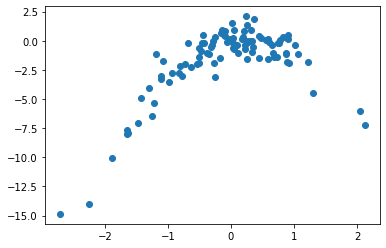

In [180]:
plt.scatter(x, y)

There is a non-linear relationship between x and y. The curve indicates a quadratic term might need to be used

# (c)

In [181]:
np.random.seed(42)

In [182]:
X = pd.DataFrame(x)
y = pd.DataFrame(y)

In [184]:
X.columns = ["X"]
y.columns = ["y"]

In [190]:
X.head()

,X
0,0.345584
1,0.821618
2,0.330437
3,-1.303157
4,0.905356


In [191]:
y.head()

,y
0,-0.544554
1,0.333950
2,-0.013532
3,-4.030442
4,0.484861


In [200]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [188]:
loo = LeaveOneOut()

In [189]:
sets = loo.get_n_splits(X)
sets

100

In [206]:
mses = []
for i in range(1, 5):
    for train, test in loo.split(X):
        X_train = X['X'][train]
        y_train = y['y'][train]
        X_test = X['X'][test]
        y_test = y['y'][test]

        model = Pipeline([('poly', PF(degree = i)),
                      ('linear', LinearRegression())])
        model.fit(np.array(X_train)[:,np.newaxis], y_train)

        mse = mean_squared_error(y_test, model.predict(np.array(X_test)[:,np.newaxis]))
        mses.append(mse)
    print('Model %i (MSE): %f' % (i,np.mean(mses)))
    mses = []

Model 1 (MSE): 6.633030
Model 2 (MSE): 1.122937
Model 3 (MSE): 1.301797
Model 4 (MSE): 1.332394


# (d)

In [208]:
np.random.seed(12)
mses = []
for i in range(1, 5):
    for train, test in loo.split(X):
        X_train = X['X'][train]
        y_train = y['y'][train]
        X_test = X['X'][test]
        y_test = y['y'][test]

        model = Pipeline([('poly', PF(degree = i)),
                      ('linear', LinearRegression())])
        model.fit(np.array(X_train)[:,np.newaxis], y_train)

        mse = mean_squared_error(y_test, model.predict(np.array(X_test)[:,np.newaxis]))
        mses.append(mse)
    print('Model %i (MSE): %f' % (i,np.mean(mses)))
    mses = []

Model 1 (MSE): 6.633030
Model 2 (MSE): 1.122937
Model 3 (MSE): 1.301797
Model 4 (MSE): 1.332394


We get the same results using LOOCV with any random seed

# (e)

Model 2 mad the smallest error. This is as expected because the relationship between X and y is quadratic

# (f)

In [211]:
for i in range(1, 5):
    pol = PF(degree = i)
    X_pol = pol.fit_transform(np.array(X['X'])[:,np.newaxis])
    y_train = y['y']

    model = sm.OLS(y_train, X_pol)
    results = model.fit()

    print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.04e-09
Time:                        22:48:33   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247     -5.937      0.0

# 9 (a)

In [212]:
from ISLP import load_data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [213]:
u = Boston.medv.mean()
u

22.532806324110677

# (b)

In [214]:
Boston.medv.std() / len(Boston)**0.5

0.4088611474975351

# (c)

In [218]:
medv = Boston["medv"]
means = []
for _ in range(100):
    m = medv.sample(len(Boston), replace=True)
    means.append(m.mean())
np.std(means)

0.4212068964734192

The above result is close to the result obtained from (c)

# (d)

In [219]:
se = np.std(means)
[u - 2*se, u + 2*se]

[21.690392531163837, 23.375220117057516]

# (e)

In [221]:
Boston.medv.median()

21.2

# (f)

In [223]:
medians = []
for _ in range(100):
    m = medv.sample(len(Boston), replace=True)
    medians.append(m.median())
np.std(medians)

0.38931317727505654

# (g)

In [224]:
u01 = np.percentile(medv, 10)
u01

12.75

# (h)

In [227]:
percentiles = []
for _ in range(100):
    p = medv.sample(len(Boston), replace=True)
    percentiles.append(np.percentile(p, 10))
np.std(percentiles)

0.5156219545364608